#        Underlying factors effecting the increased consumption of Cannabis                                                among Canada population


Canadian Perspectives Survey Series 6, 2021: Substance Use and Stigma During the
Pandemic (CPSS 2021 Substance Use and Stigma)

# Problem statement:

During the pandemic, there was an observation of increased usage of Cannabis in Canada. As the impact of the epidemic is difficult to evaluate and the retail environment is rapidly altering in various jurisdictions, with more cannabis outlets opening and more items entering to market, Statistics Canada stressed that continuous monitoring of cannabis consumption is important. The Canadian Perspective Survey Series 6 conducted in 2021 is focused on substance use and stigma during the pandemic. The survey captures all basic factors of respondents like age, house, marital status, income etc., along with series of questions with relevant options. Around 3940 people participated in the survey. With the available data, the project aims to find the frequency of consumption of cannabis during COVID-19 and  various underlying factors that contribute to the increased consumption of cannabis among individuals for which we would need a prediction model that could be useful in creating awareness and control the usage.  

The outcome variable is the frequency of consumption of cannabis in the past 30 days, Out of 3940 records, 1128 people are using cannabis and have recorded their frequency and the rest are not using cannabis. The outcome variable is categorical and we will be applying machine learning algorithms on these 1128 records and come up with the best prediction model that gives most accuracy in predicting the outcome variable.




# Variables:

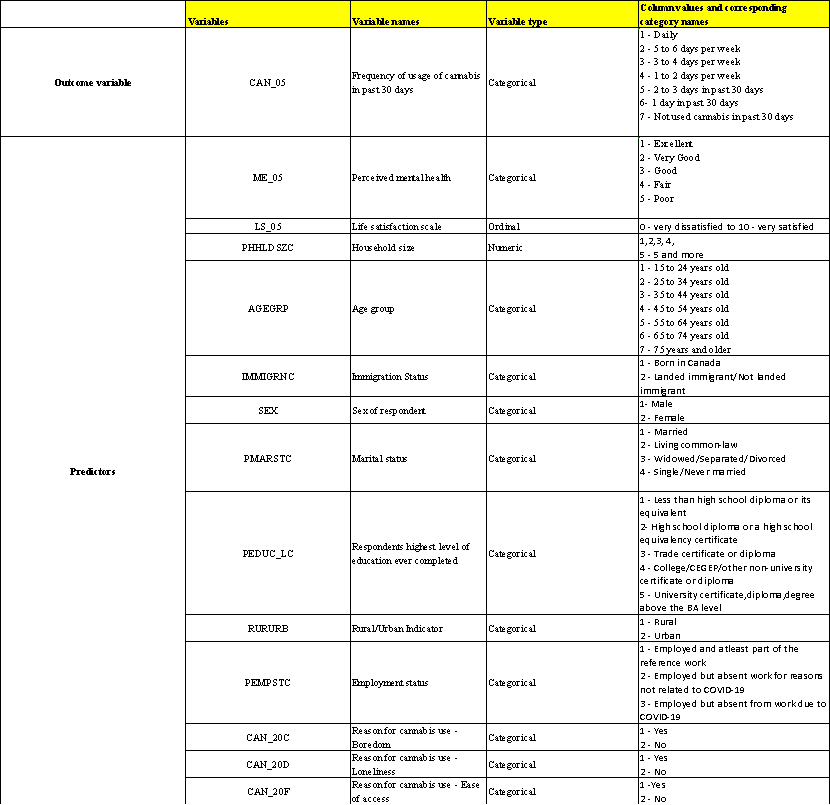


# Project Flow

- Import Dataset
- Clean the dataset by imputing null values
- Data exploration and feature selection using chisquare and correlation matrix
- Train a classifier (Decision Tree, Random Forest, Ada boost classifier, SVM, K-Neighbours, Naive Bayes, LDA and PCA)
- Predict target using the trained classifier and calculate the accuracy for each trained classifier
- Inferences and Discussion

Import the necessary librares required for data analysis and to implement the machine learning algorithms


In [1]:
#importing the libraries

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pylab as p 

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

import scipy.stats as stats

#to measure the quality of predictions from a classification algorithm.
from sklearn.datasets import make_classification
#to perform cross validation
from sklearn.model_selection import cross_val_score
#to perform repated stratified Kfold
from sklearn.model_selection import RepeatedStratifiedKFold




In [2]:
#to read the dataset and store it in variable dataset
dataset=pd.read_excel("project_dataset_v2.xlsx")

In [3]:
#to find the first 5 rows of the data
dataset.head()

CAN_05  ME_05  LS_05  PHHLDSZC  AGEGRP  IMMIGRNC  SEX  PMARSTC  PEDUC_LC  \
0       1    3.0    7.0         1       4         1    1        4         6   
1       6    3.0    9.0         2       5         1    2        3         6   
2       7    4.0    7.0         1       2         1    2        4         6   
3       1    3.0    9.0         2       3         1    1        1         2   
4       7    2.0    8.0         1       6         1    2        4         2   

   RURURB  PEMPSTC  CAN_20C  CAN_20D  CAN_20F  
0       2      1.0      NaN      NaN      NaN  
1       2      1.0      2.0      2.0      2.0  
2       2      1.0      NaN      NaN      NaN  
3       1      1.0      NaN      NaN      NaN  
4       2      1.0      NaN      NaN      NaN

In [4]:
#to know the dataset and column data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAN_05    1128 non-null   int64  
 1   ME_05     1126 non-null   float64
 2   LS_05     1126 non-null   float64
 3   PHHLDSZC  1128 non-null   int64  
 4   AGEGRP    1128 non-null   int64  
 5   IMMIGRNC  1128 non-null   int64  
 6   SEX       1128 non-null   int64  
 7   PMARSTC   1128 non-null   int64  
 8   PEDUC_LC  1128 non-null   int64  
 9   RURURB    1128 non-null   int64  
 10  PEMPSTC   1097 non-null   float64
 11  CAN_20C   251 non-null    float64
 12  CAN_20D   251 non-null    float64
 13  CAN_20F   251 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 123.5 KB


In [5]:
#Statistical information about the data
dataset.describe()

CAN_05        ME_05        LS_05     PHHLDSZC       AGEGRP  \
count  1128.000000  1126.000000  1126.000000  1128.000000  1128.000000   
mean      5.027482     2.988455     7.293961     1.875887     3.748227   
std       2.263116     1.063683     2.200949     0.798526     1.532984   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     2.000000     6.000000     1.000000     2.000000   
50%       6.000000     3.000000     8.000000     2.000000     4.000000   
75%       7.000000     4.000000     9.000000     2.000000     5.000000   
max       7.000000     5.000000    11.000000     5.000000     7.000000   

          IMMIGRNC          SEX      PMARSTC     PEDUC_LC       RURURB  \
count  1128.000000  1128.000000  1128.000000  1128.000000  1128.000000   
mean      1.109043     1.493794     2.303191     4.437057     1.820035   
std       0.311831     0.500183     1.266702     1.823034     0.384328   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     3.000000     2.000000   
50%       1.000000     1.000000     2.000000     4.000000     2.000000   
75%       1.000000     2.000000     4.000000     6.000000     2.000000   
max       2.000000     2.000000     4.000000     7.000000     2.000000   

           PEMPSTC     CAN_20C     CAN_20D     CAN_20F  
count  1097.000000  251.000000  251.000000  251.000000  
mean      1.960802    1.482072    1.721116    1.733068  
std       1.362732    0.500677    0.449347    0.443241  
min       1.000000    1.000000    1.000000    1.000000  
25%       1.000000    1.000000    1.000000    1.000000  
50%       1.000000    1.000000    2.000000    2.000000  
75%       4.000000    2.000000    2.000000    2.000000  
max       4.000000    2.000000    2.000000    2.000000

# Data Cleaning 
The dataset contains missing values. Hence, the data needs to cleaned by imputing the missing values.
In our project, the missing values are imputed with value 0 and treated as a separate category as value unknown

In [6]:

#to find if there are null values in our dataset
dataset.isnull().sum()

CAN_05        0
ME_05         2
LS_05         2
PHHLDSZC      0
AGEGRP        0
IMMIGRNC      0
SEX           0
PMARSTC       0
PEDUC_LC      0
RURURB        0
PEMPSTC      31
CAN_20C     877
CAN_20D     877
CAN_20F     877
dtype: int64

In [7]:
#impute the null values and treat them as a separate category as value unknown


dataset['ME_05']=dataset['ME_05'].fillna(0)
dataset['LS_05']=dataset['LS_05'].fillna(0)
dataset['PEMPSTC']=dataset['PEMPSTC'].fillna(0)
dataset['PEMPSTC']=dataset['PEMPSTC'].fillna(0)
dataset["CAN_20C"]=dataset["CAN_20C"].fillna(0)   
dataset["CAN_20D"]=dataset["CAN_20D"].fillna(0)
dataset["CAN_20F"]=dataset["CAN_20F"].fillna(0)

# Data exploration

Features and the target variables are explored using countplot and distplots.
How the categories are distributed within the variables

In [8]:
#all the columns of the dataset are stored in columns variable
columns=dataset.columns
columns

Index(['CAN_05', 'ME_05', 'LS_05', 'PHHLDSZC', 'AGEGRP', 'IMMIGRNC', 'SEX',
       'PMARSTC', 'PEDUC_LC', 'RURURB', 'PEMPSTC', 'CAN_20C', 'CAN_20D',
       'CAN_20F'],
      dtype='object')

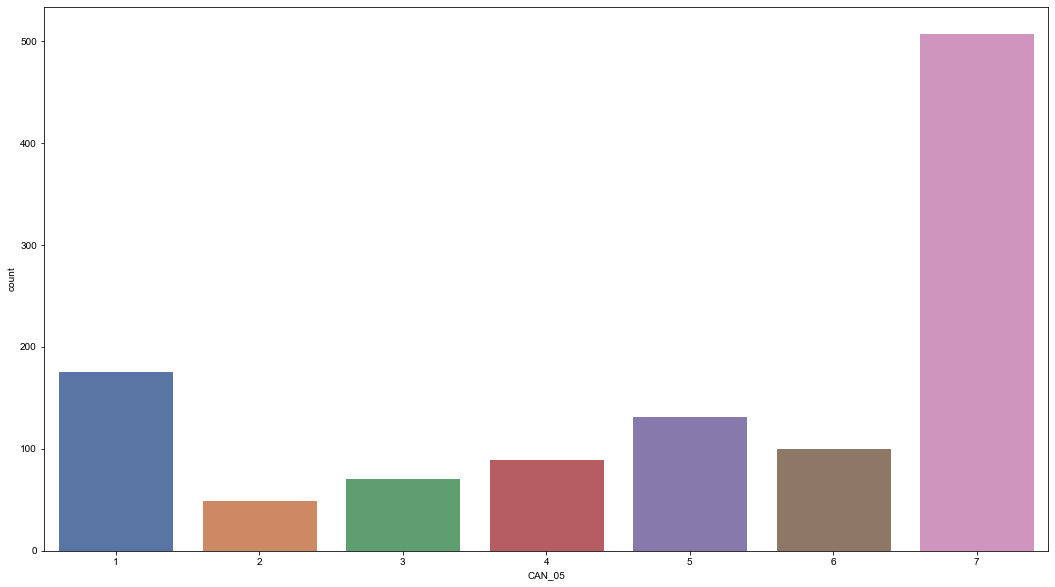

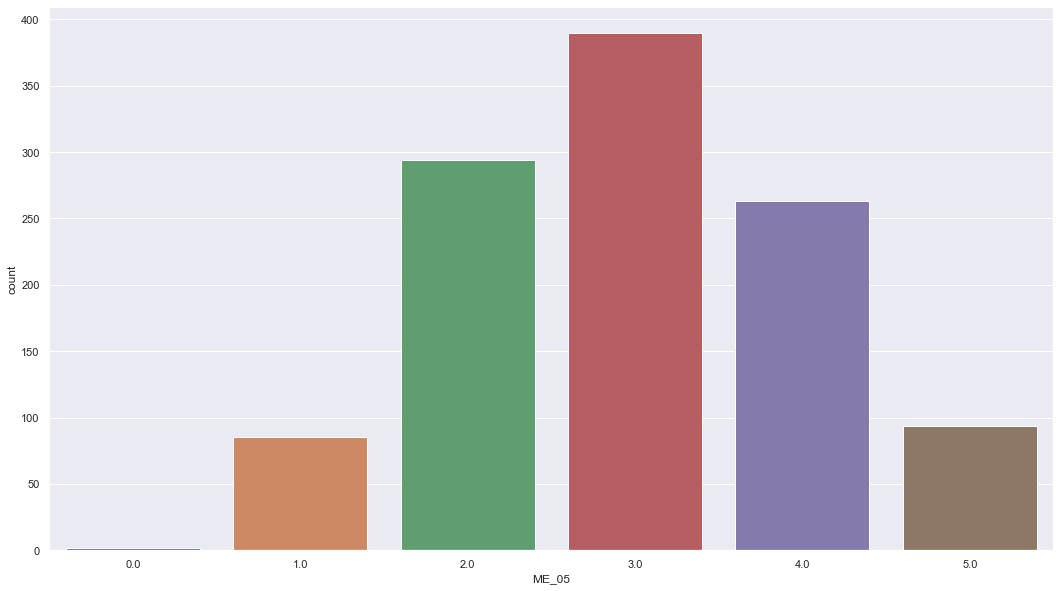

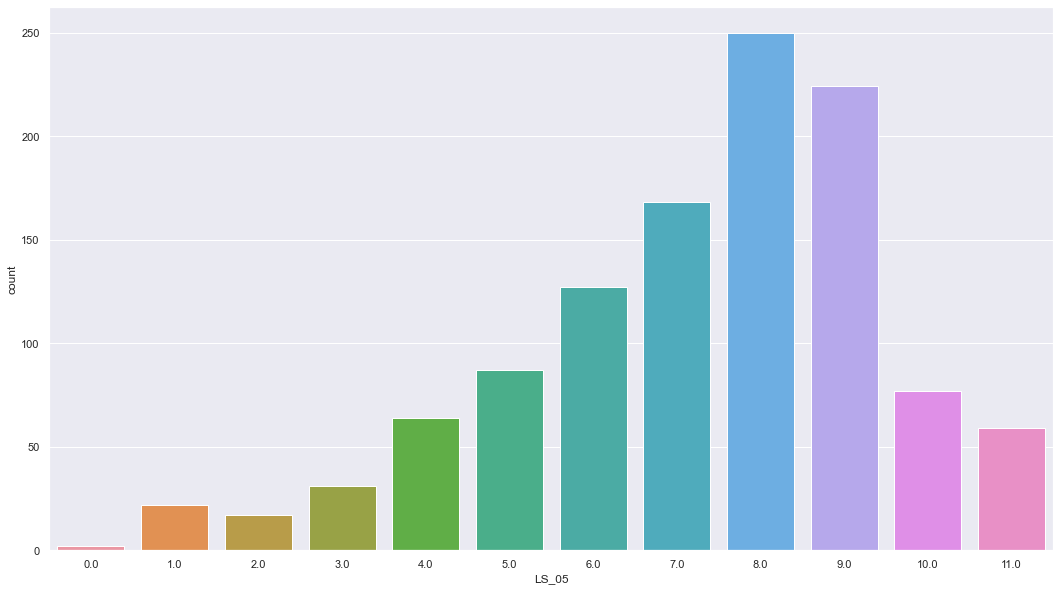

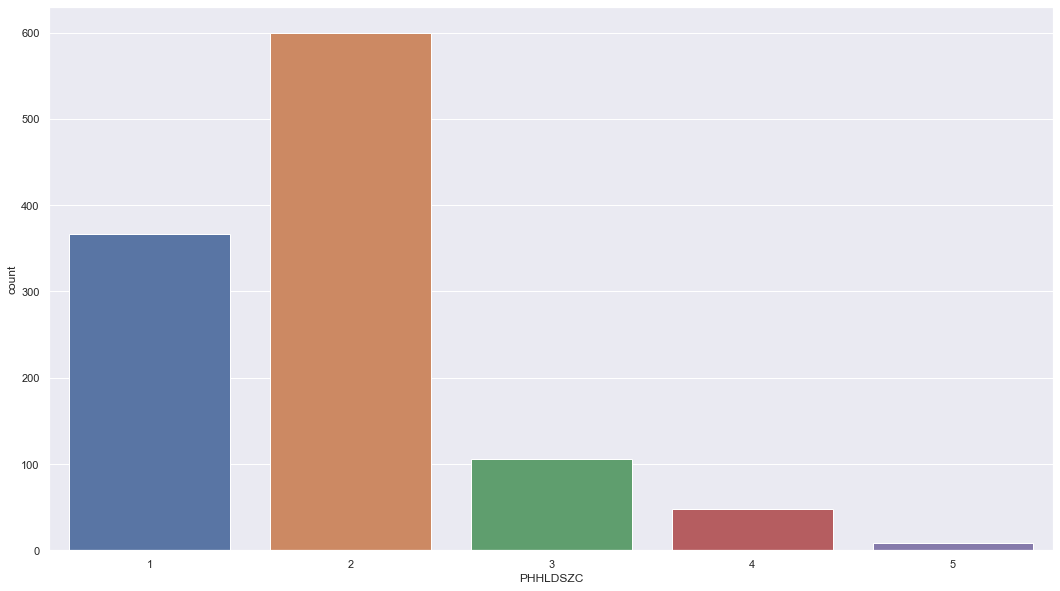

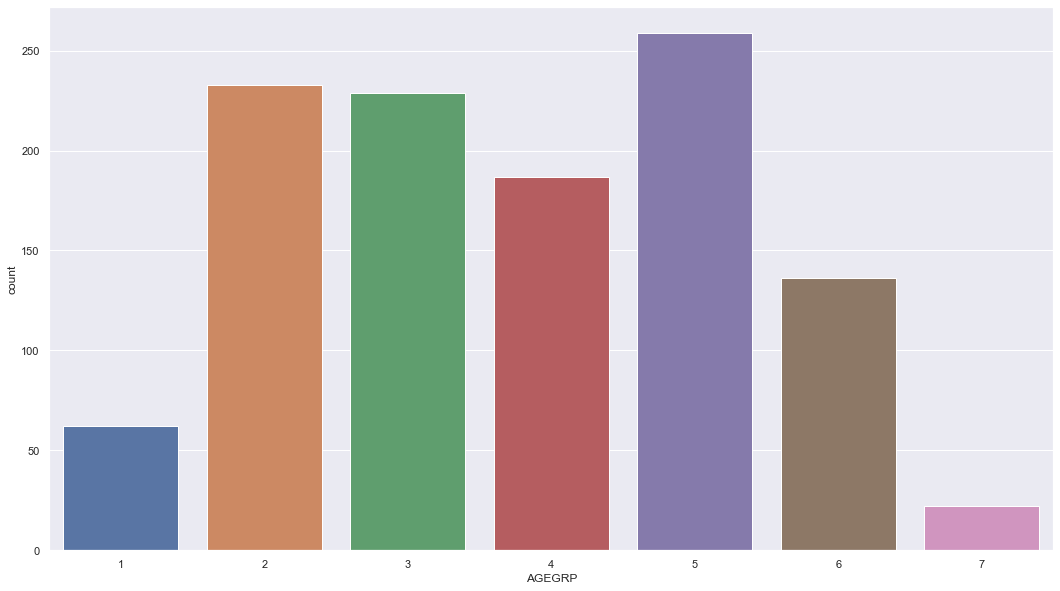

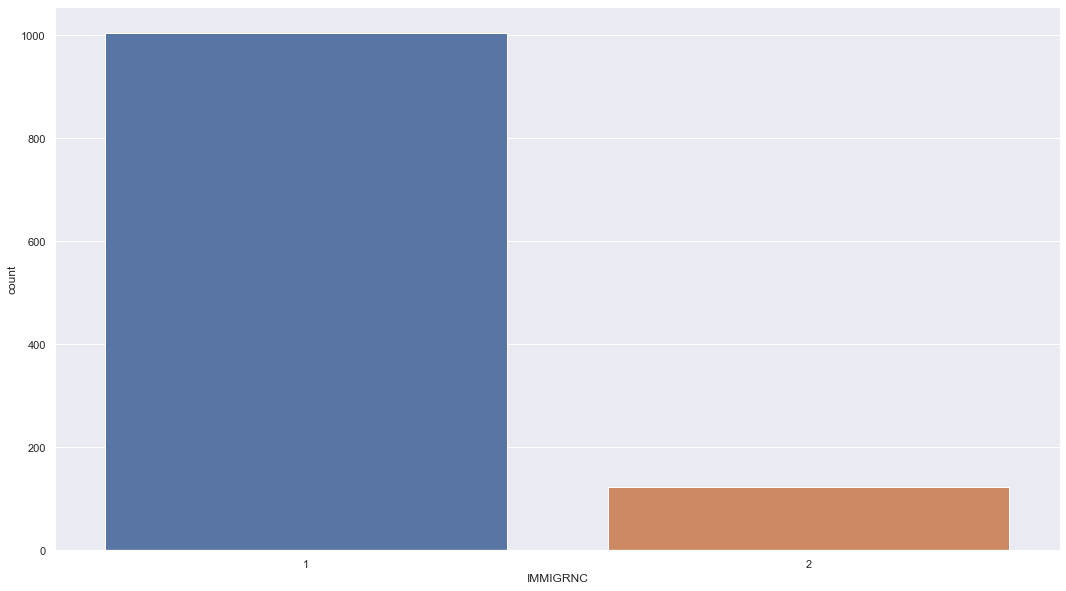

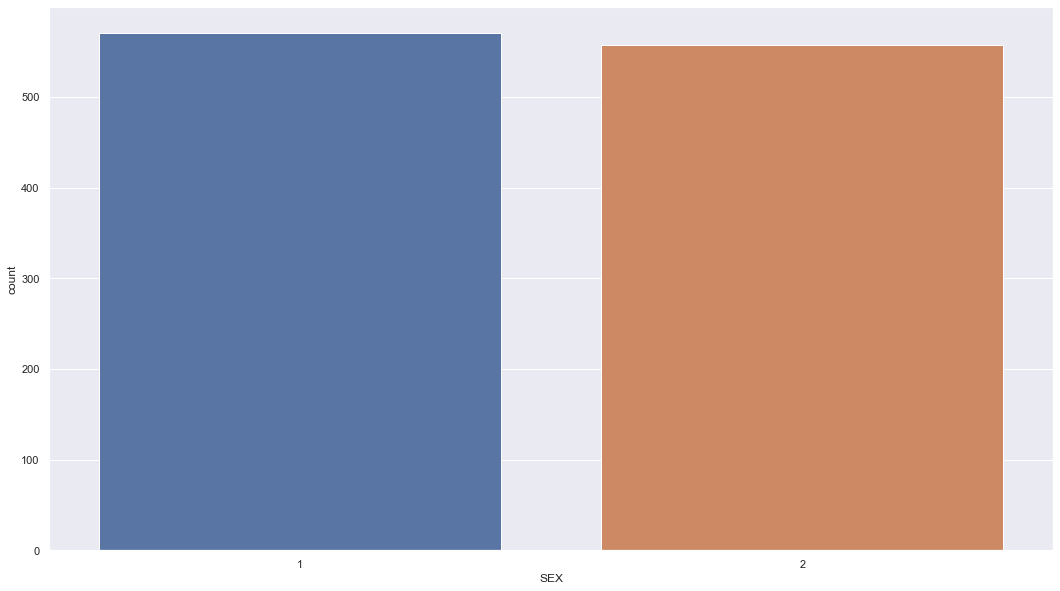

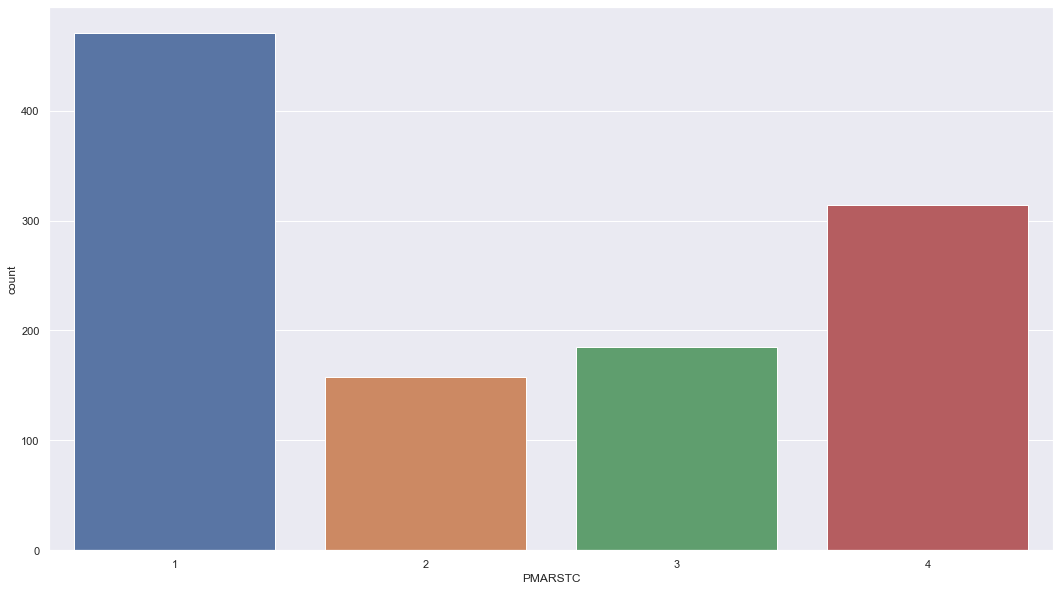

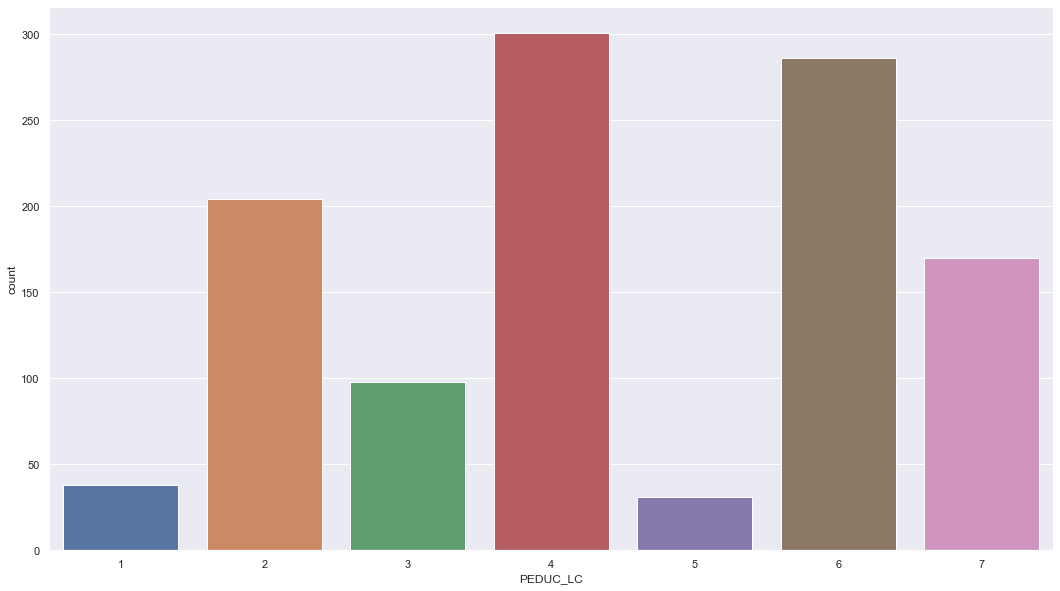

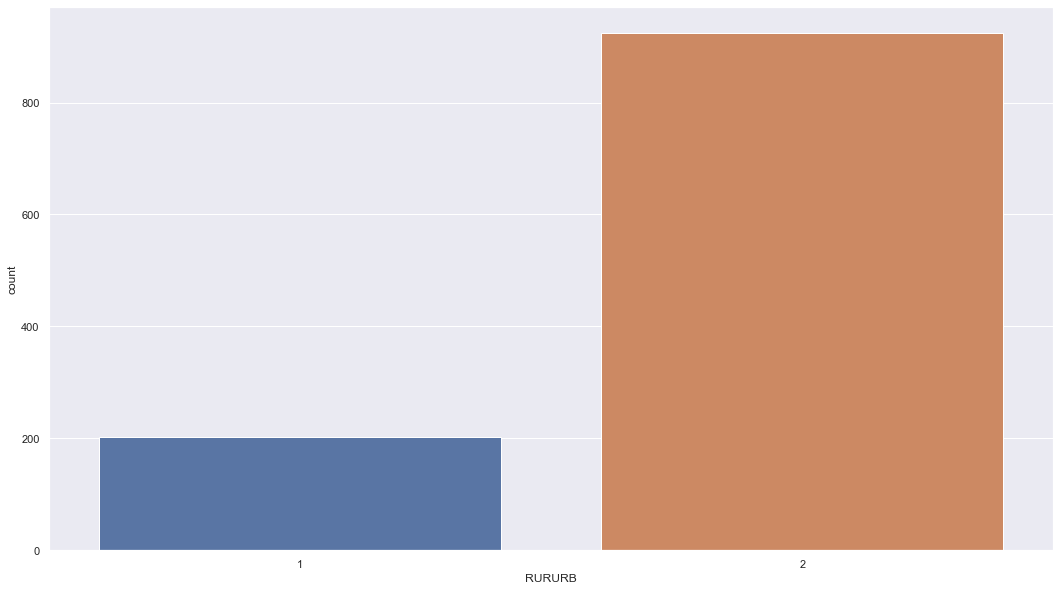

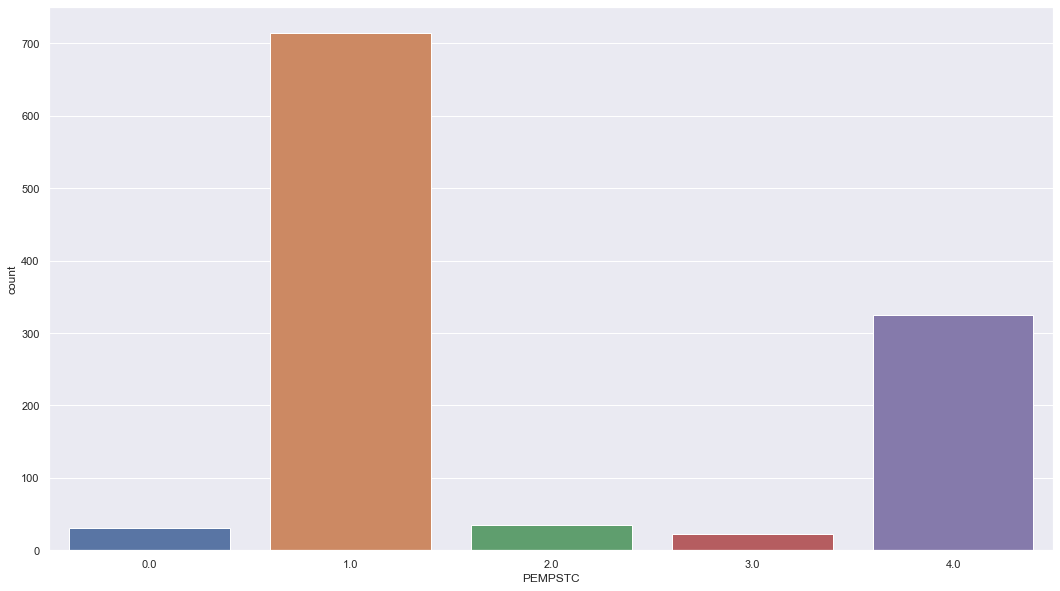

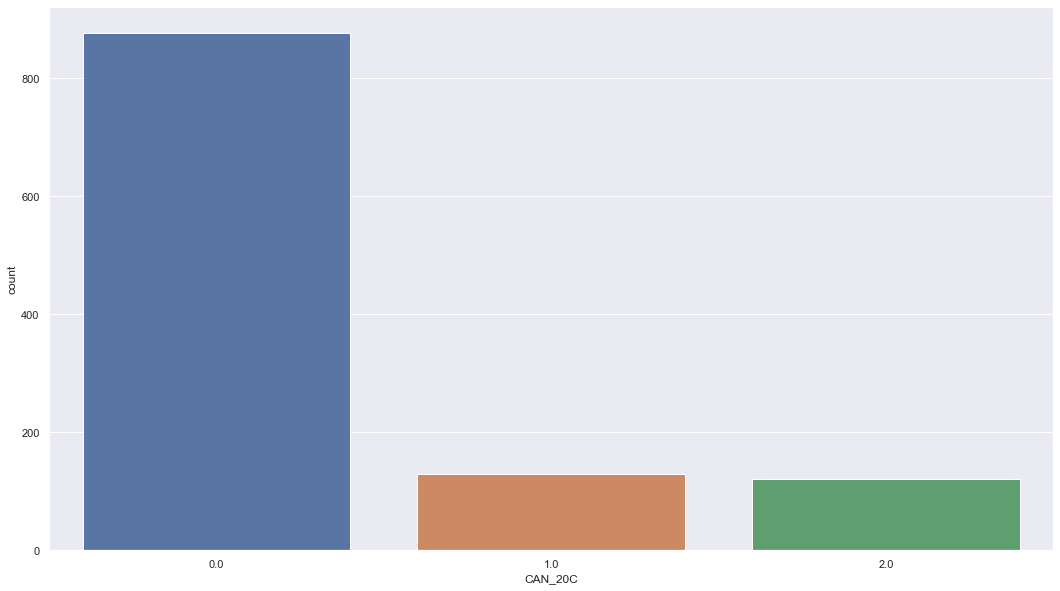

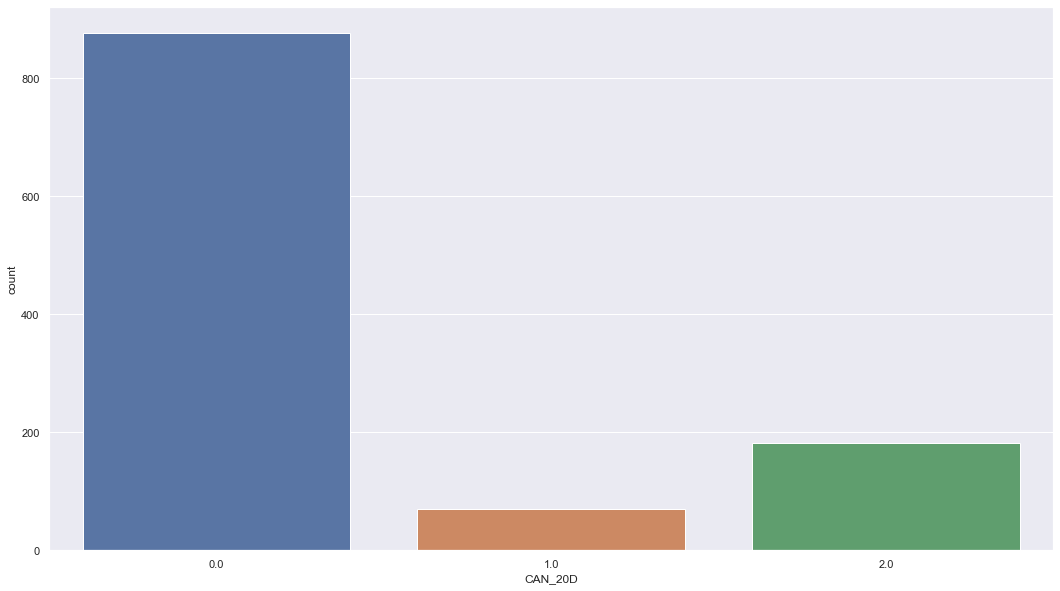

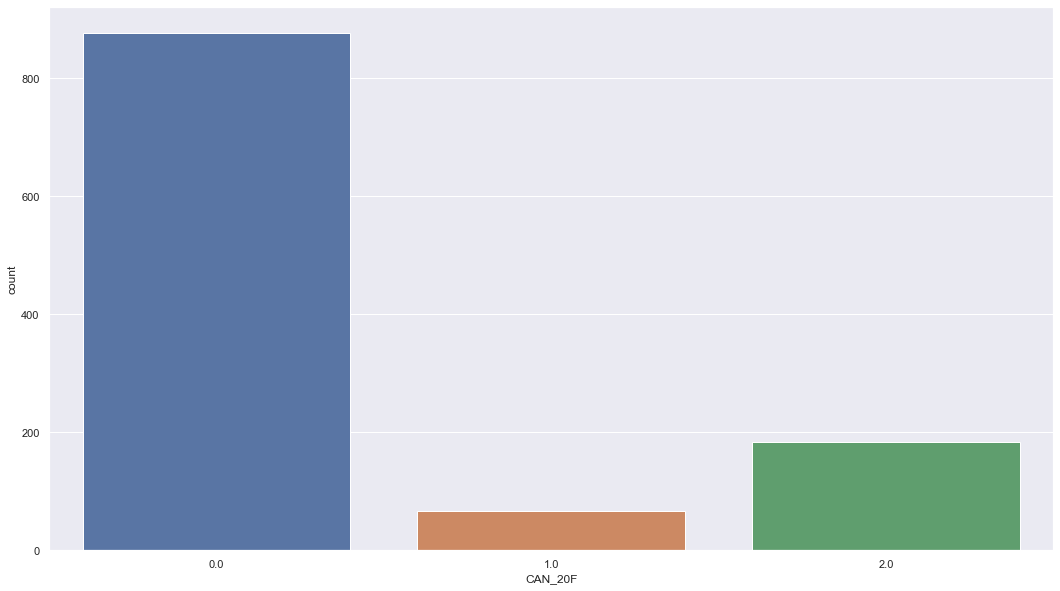

In [9]:
#Count plot of all the columns in the data
for col in columns:
    plt.subplots(figsize=(18,10))
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(x=col, data=dataset)
    

In [10]:
#count of the target variable in all categories
dataset['CAN_05'].value_counts(sort=False)

1    176
2     50
3     71
4     90
5    132
6    101
7    508
Name: CAN_05, dtype: int64

C:\Users\91984\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91984\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91984\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

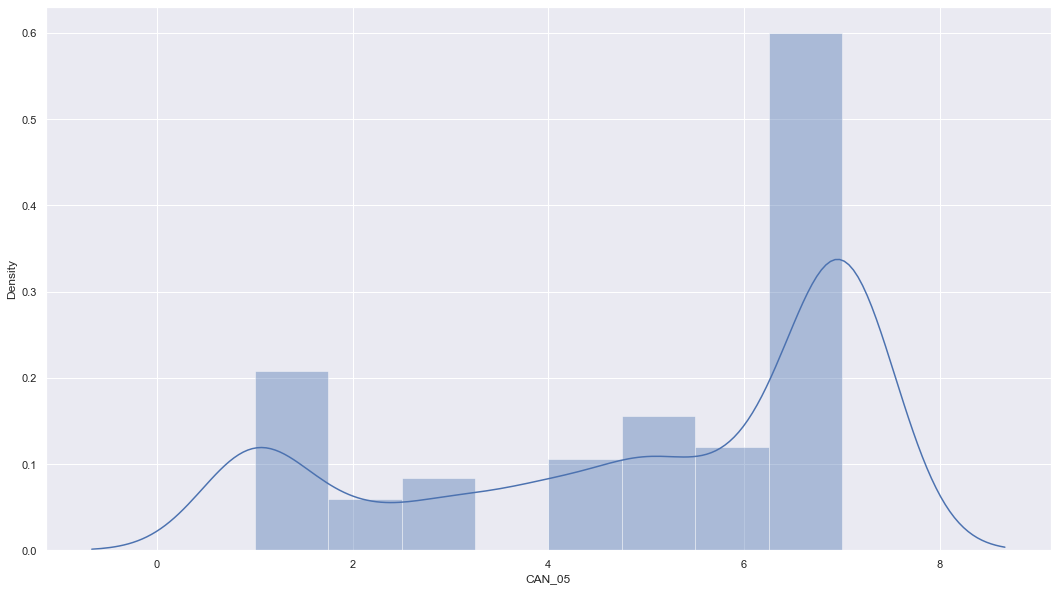

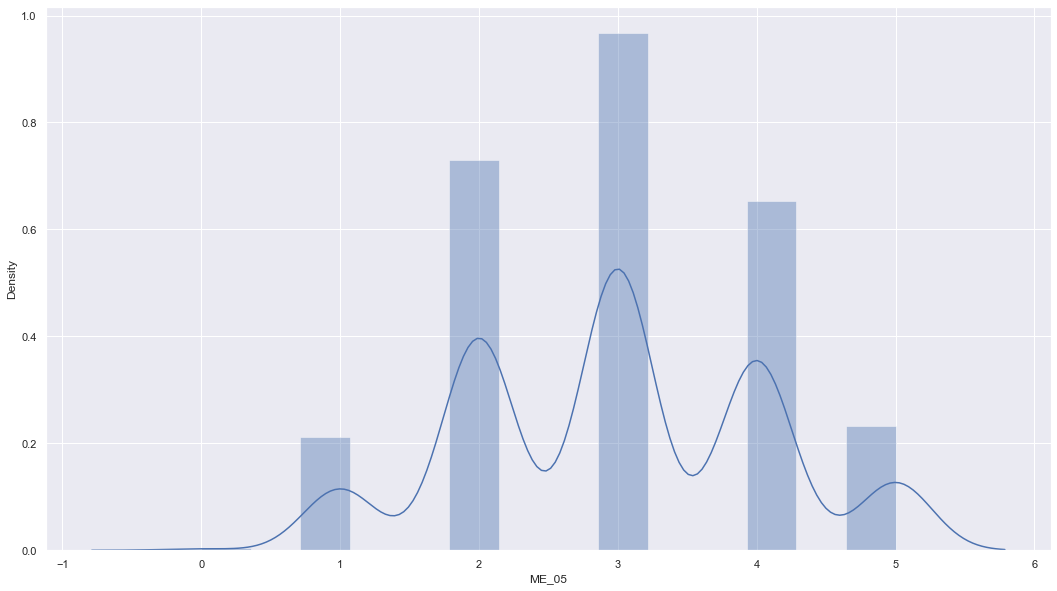

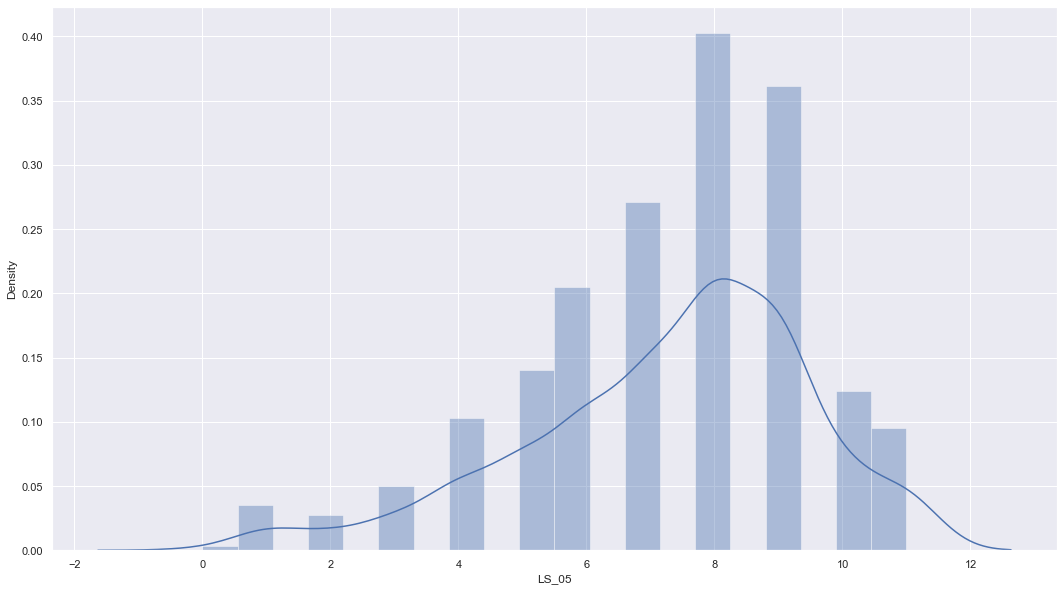

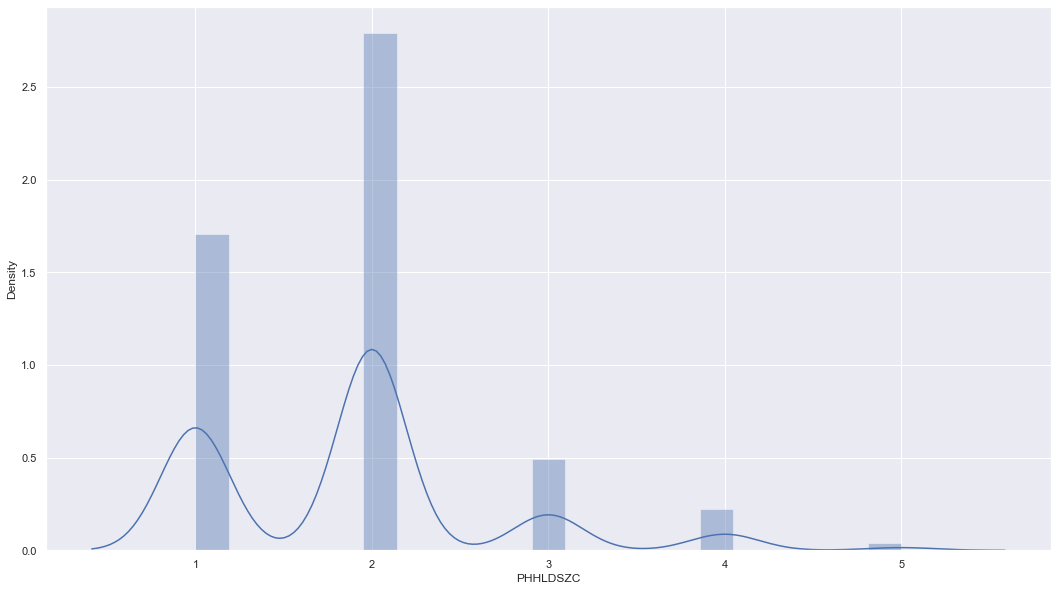

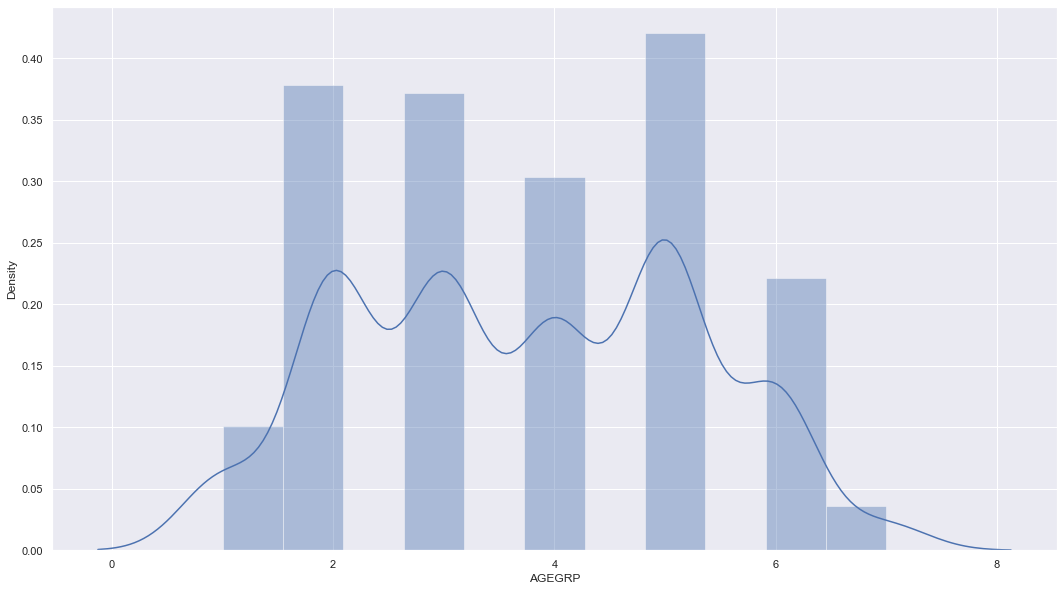

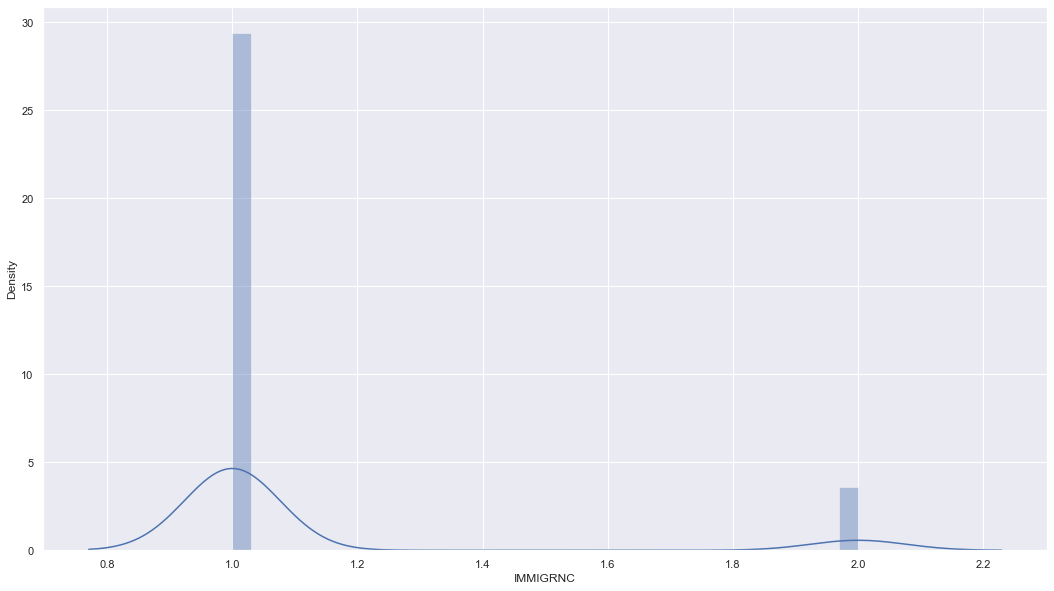

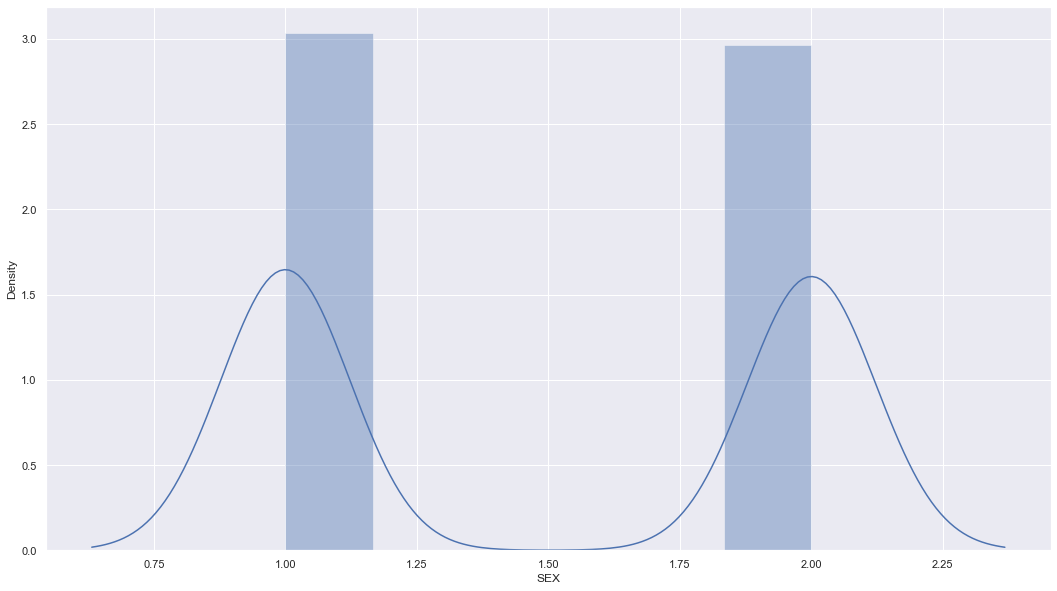

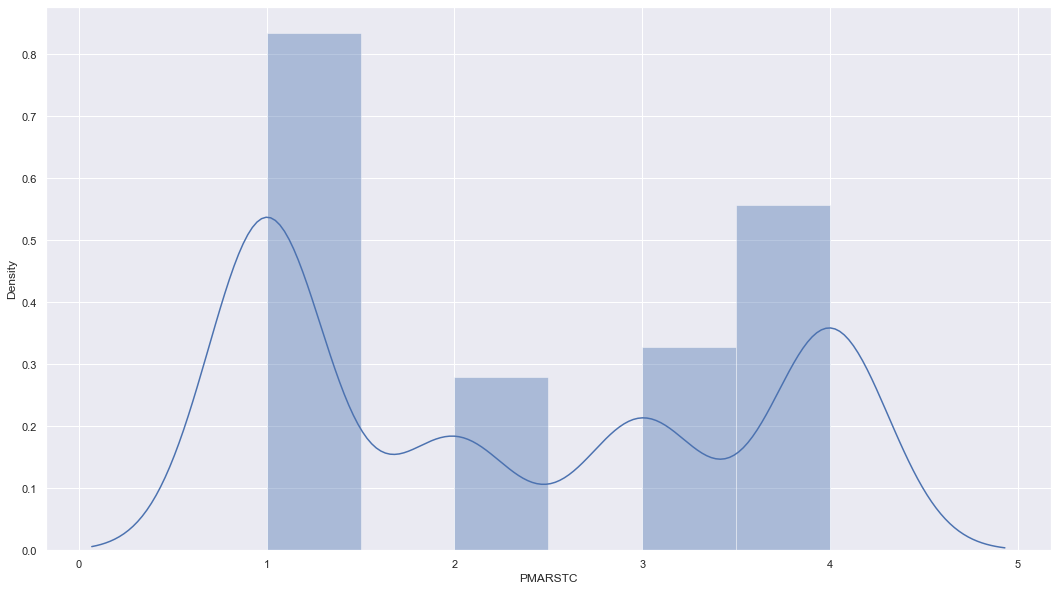

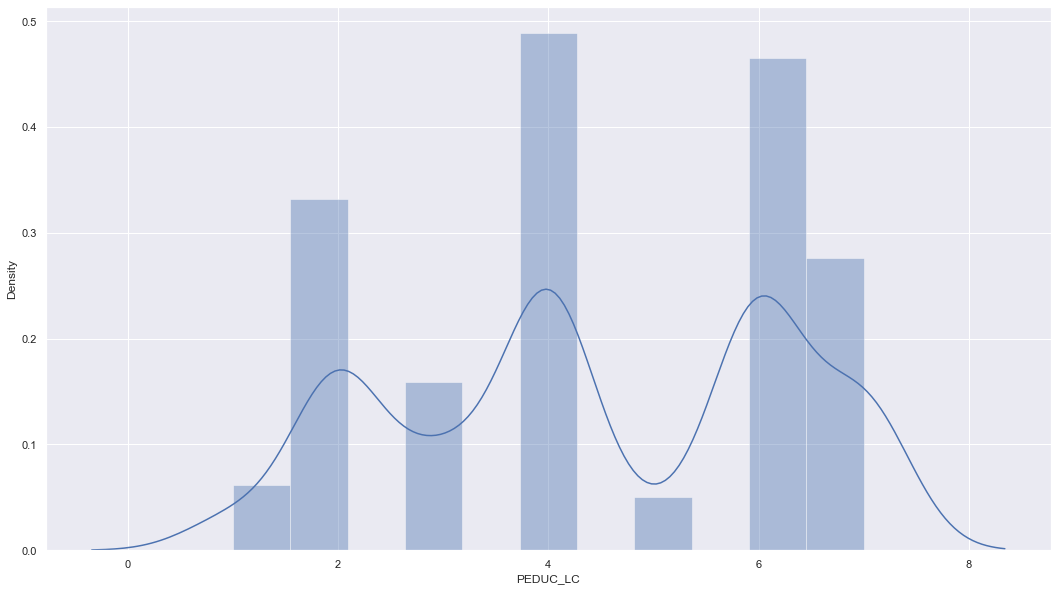

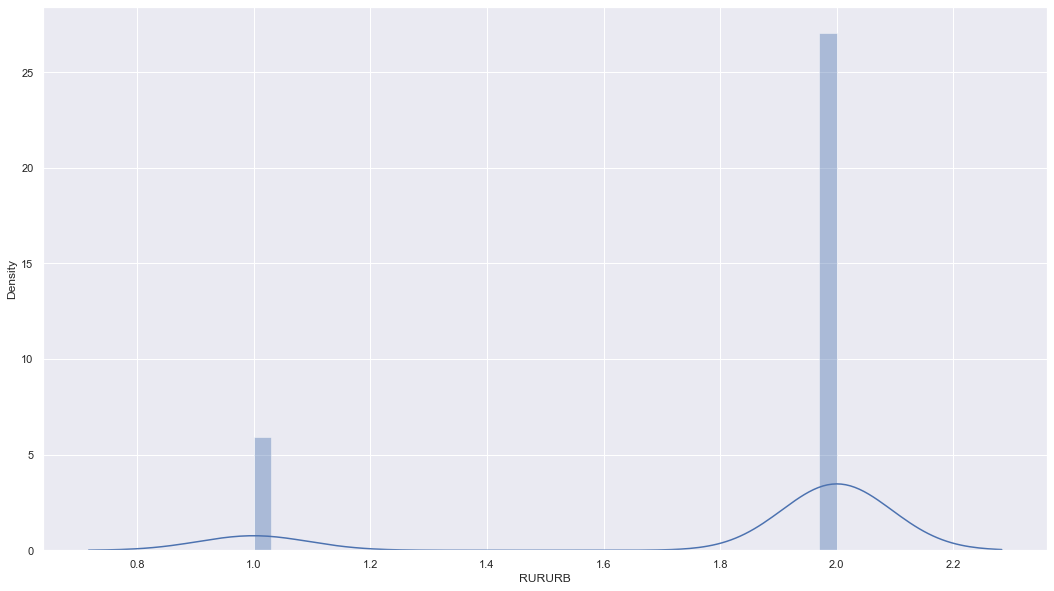

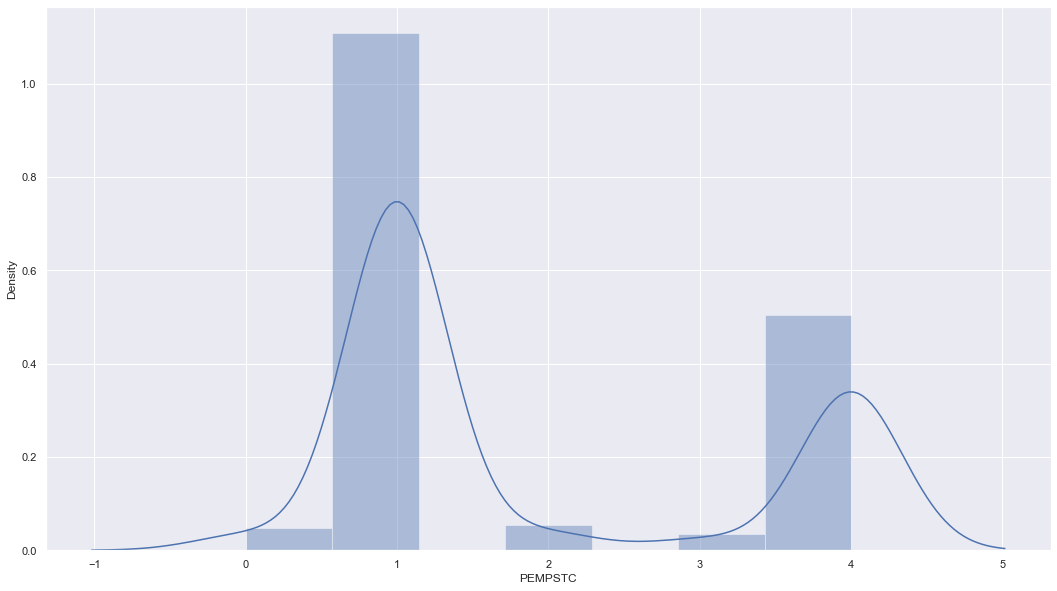

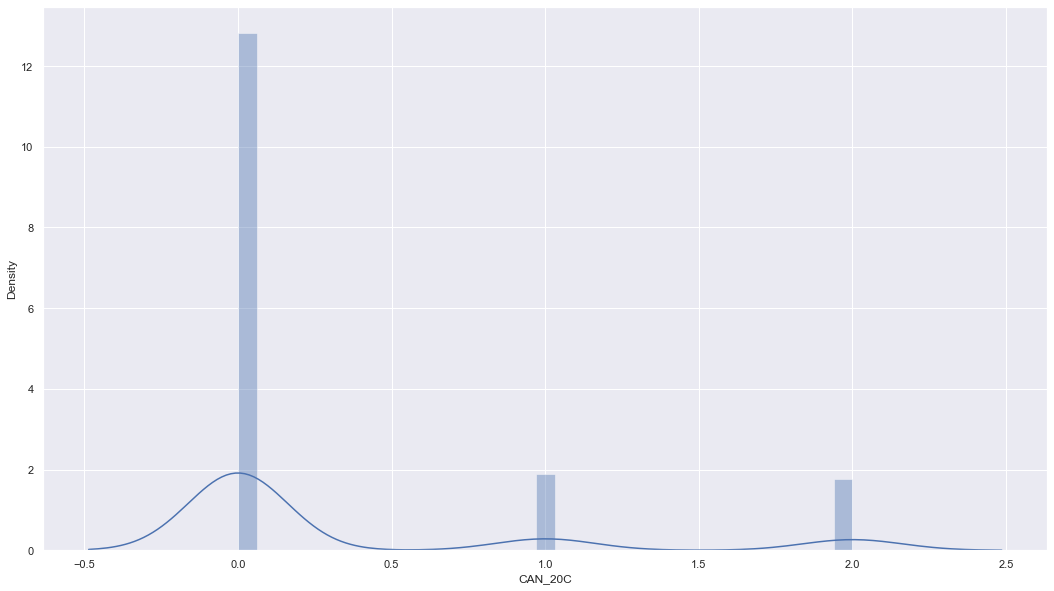

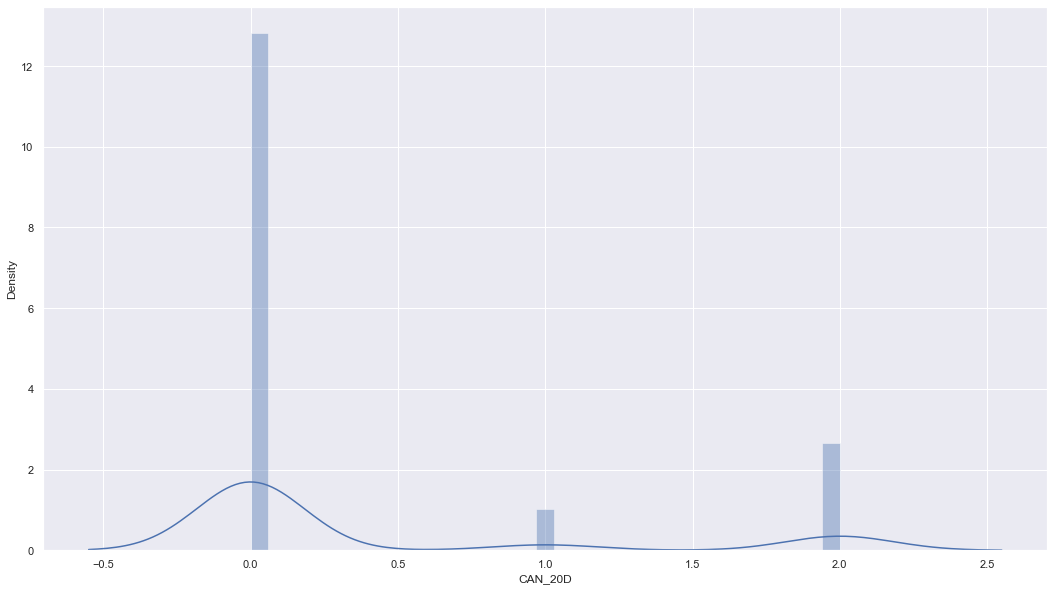

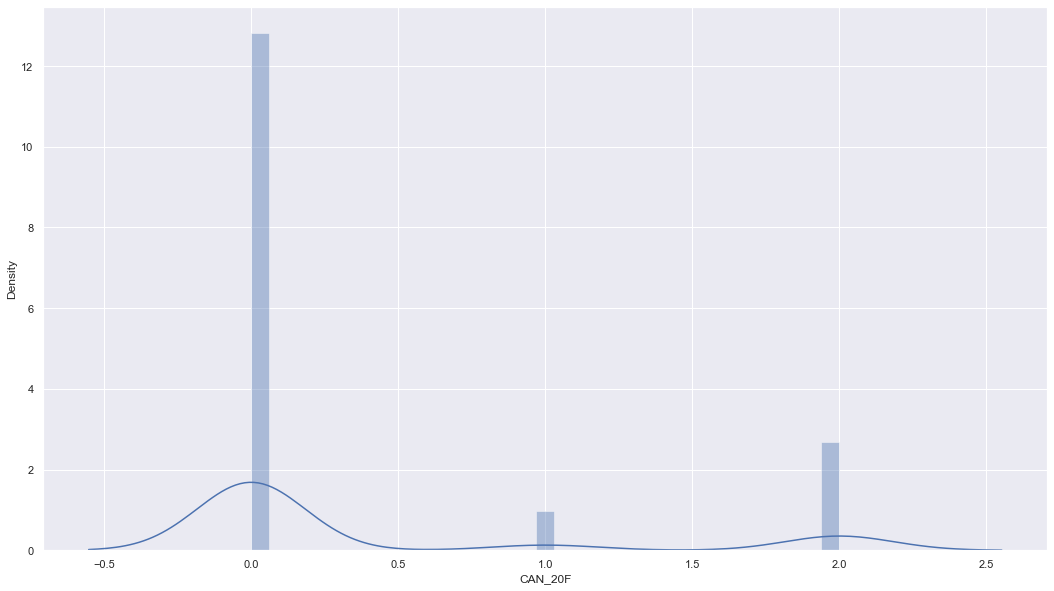

In [11]:
#to check if the variables are normally distributed among the categories
for col in columns:
    plt.subplots(figsize=(18,10))
    sns.set_theme(style="darkgrid")
    ax = sns.distplot(dataset[col])
    

From the above graphs, we can figure out that this is an imbalanced classification problem.

To find the distribution of the categories in the target variable using a pie chart:

In [12]:
# class count
class_count_1, class_count_2,class_count_3,class_count_4,class_count_5,class_count_6,class_count_7= dataset['CAN_05'].value_counts(sort=False)

# Separate class
class_1 = dataset[dataset['CAN_05'] == 1]
class_2 = dataset[dataset['CAN_05'] == 2]
class_3 = dataset[dataset['CAN_05'] == 3]
class_4 = dataset[dataset['CAN_05'] == 4]
class_5 = dataset[dataset['CAN_05'] == 5]
class_6 = dataset[dataset['CAN_05'] == 6]
class_7 = dataset[dataset['CAN_05'] == 7]# print the shape of the class
print('class 1:', class_1.shape,'class 2:', class_2.shape,'class 3:', class_3.shape,'class 4:', class_4.shape,'class 5:', class_5.shape,
     'class 6:', class_6.shape,'class 7:', class_7.shape)


class 1: (176, 14) class 2: (50, 14) class 3: (71, 14) class 4: (90, 14) class 5: (132, 14) class 6: (101, 14) class 7: (508, 14)


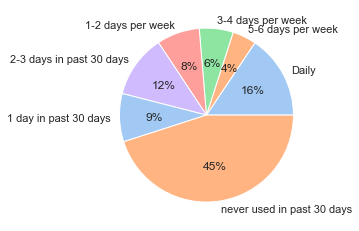

In [13]:
#define data
data = [class_1.shape[0], class_2.shape[0], class_3.shape[0], class_4.shape[0],class_5.shape[0],class_6.shape[0],class_7.shape[0]]
labels = ['Daily','5-6 days per week','3-4 days per week','1-2 days per week','2-3 days in past 30 days','1 day in past 30 days','never used in past 30 days']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart of the target variable
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Feature Selection

Feature selection is essential as it improves the machine learning process and increases the predictive power of the ML algorithms by selecting the most important variables and eliminating redundant or irrelevant featues

In our project, we are using the filter methods for feature selection.
Chi-suare test and correlation coefficient to select the features

Feature selection techniques:


https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [14]:
#importing libraries to do the chi square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

names = dataset.columns
array = dataset.values
X=dataset.iloc[:,1:]
Y=dataset.iloc[:,0]

#find the 10 best features using the chi square test 

bestfeatures= SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,Y)


In [15]:
#display the selected features from the chi square test along with their scores
dfscores =pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Features', 'Score']
print(featureScores.nlargest(10,'Score')) #10 best features selected 

    Features       Score
12   CAN_20F  274.258350
11   CAN_20D  257.994032
10   CAN_20C  214.692164
9    PEMPSTC   22.156332
7   PEDUC_LC   20.017093
0      ME_05   19.277946
1      LS_05   11.732972
3     AGEGRP    9.819388
6    PMARSTC    4.401406
2   PHHLDSZC    3.906938


There were 13 features in the data set and the chi square test has selected top 10 features useful for the machine learning algorithms.
The  variables 'RURURB', 'SEX' and 'IMMIGRNC' are not considered in building our model as they are less useful in predicting the target variable

Finding the correlation between the independent variables and removing the features that have high correlation to avaoid multicolinearity

CAN_05     ME_05     LS_05  PHHLDSZC    AGEGRP  IMMIGRNC  \
CAN_05    1.000000 -0.200947  0.121894  0.044606  0.040616  0.030955   
ME_05    -0.200947  1.000000 -0.671680 -0.034637 -0.225425 -0.042352   
LS_05     0.121894 -0.671680  1.000000  0.070237  0.089889 -0.007134   
PHHLDSZC  0.044606 -0.034637  0.070237  1.000000 -0.117606 -0.048940   
AGEGRP    0.040616 -0.225425  0.089889 -0.117606  1.000000  0.063051   
IMMIGRNC  0.030955 -0.042352 -0.007134 -0.048940  0.063051  1.000000   
SEX       0.048358  0.073571 -0.031586 -0.055248 -0.057585 -0.044013   
PMARSTC  -0.067909  0.119629 -0.106355 -0.393484 -0.250814 -0.002904   
PEDUC_LC  0.145052 -0.073087  0.080550 -0.111429  0.023217  0.119003   
RURURB   -0.023893  0.076761 -0.047781 -0.015020 -0.061913  0.052831   
PEMPSTC  -0.057357 -0.007663 -0.073324 -0.085279  0.401167  0.017402   
CAN_20C  -0.301196  0.189955 -0.143169  0.013750 -0.125657 -0.041216   
CAN_20D  -0.312309  0.177947 -0.125970  0.027701 -0.143566 -0.027077   
CAN_20F  -0.355613  0.219029 -0.166207  0.001464 -0.135286 -0.028174   

               SEX   PMARSTC  PEDUC_LC    RURURB   PEMPSTC   CAN_20C  \
CAN_05    0.048358 -0.067909  0.145052 -0.023893 -0.057357 -0.301196   
ME_05     0.073571  0.119629 -0.073087  0.076761 -0.007663  0.189955   
LS_05    -0.031586 -0.106355  0.080550 -0.047781 -0.073324 -0.143169   
PHHLDSZC -0.055248 -0.393484 -0.111429 -0.015020 -0.085279  0.013750   
AGEGRP   -0.057585 -0.250814  0.023217 -0.061913  0.401167 -0.125657   
IMMIGRNC -0.044013 -0.002904  0.119003  0.052831  0.017402 -0.041216   
SEX       1.000000  0.096804  0.015141 -0.012738  0.034473  0.035757   
PMARSTC   0.096804  1.000000 -0.050902  0.079372 -0.008196  0.058576   
PEDUC_LC  0.015141 -0.050902  1.000000  0.103495 -0.135318 -0.017386   
RURURB   -0.012738  0.079372  0.103495  1.000000 -0.024893  0.055761   
PEMPSTC   0.034473 -0.008196 -0.135318 -0.024893  1.000000 -0.034406   
CAN_20C   0.035757  0.058576 -0.017386  0.055761 -0.034406  1.000000   
CAN_20D   0.015870  0.047857 -0.018124  0.076497 -0.029056  0.934888   
CAN_20F   0.017011  0.077545 -0.027306  0.074678 -0.023531  0.915648   

           CAN_20D   CAN_20F  
CAN_05   -0.312309 -0.355613  
ME_05     0.177947  0.219029  
LS_05    -0.125970 -0.166207  
PHHLDSZC  0.027701  0.001464  
AGEGRP   -0.143566 -0.135286  
IMMIGRNC -0.027077 -0.028174  
SEX       0.015870  0.017011  
PMARSTC   0.047857  0.077545  
PEDUC_LC -0.018124 -0.027306  
RURURB    0.076497  0.074678  
PEMPSTC  -0.029056 -0.023531  
CAN_20C   0.934888  0.915648  
CAN_20D   1.000000  0.931179  
CAN_20F   0.931179  1.000000

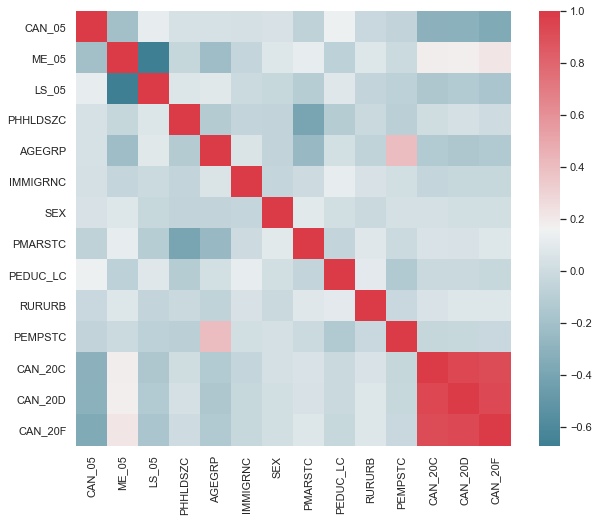

In [16]:
#Finding the correlation between the variables using Pearson method 
temp=dataset.corr(method="pearson")
f, ax = plt.subplots(figsize=(10, 8))

#correlation matrix highlighting the variables that are highly correlated 
sns.heatmap(temp, mask=np.zeros_like(temp, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

temp

We can observe that CAN_20C, CAN_20D and CAN_20F are highly correlated. Let us keep only one of these 3 features in our model.
Since CAN_20F has better correlation with target variable compared to CAN_20C and CAN_20D, we will retain CAN_20F and eliminate CAN_20C and CAN_20D

In [17]:
#Selected features are given to features_names and considered as our predictor variable X 
feature_names = ['ME_05', 'LS_05', 'PHHLDSZC','AGEGRP', 'PMARSTC', 'PEDUC_LC', 'PEMPSTC','CAN_20F']
X=dataset[feature_names]

# Split the dataset intro train and test
The data is split into train and test data in order to avoid overfitting.The model is trained to predict on data that it has never seen and then the accuracy is calculated


In [18]:
#split the main data into train and test data

#split the data such that 80% is train data and 20% is test data
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)

#to know the shape of train and test data set
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (902, 8)
Testing split input-  (226, 8)


# Decision tree classifier to predict the target variable 

Since, this is a multi-class problem with our target variable having 7 categories, we can use the decision tree classifier to predict the output.
Decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. 

In [19]:
#build a decision tree with min_samples_split as 100 to avoid overfitting 
dtree=DecisionTreeClassifier(min_samples_split=100)
#use the training set to train the model
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [20]:
# predict target of testing set
y_pred = dtree.predict(X_test)

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance.
We will be using the accuracy scores to compare the model performance.

In [21]:
#Evaluate decision tree model

from sklearn.metrics import accuracy_score

# get the accurancy of the decision tree model
accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ",accuracy*100 )

# Classification report is used to measure the quality of predictions from a classification algorithm. 
#How many predictions are True and how many are False. More specifically, True Positives, False Positives, 
#True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

print("Classification report - \n", classification_report(y_test,y_pred))

#Precision and recall for each clases is shown 
#Precision quantifies the number of positive class predictions that actually belong to the positive class. 
#Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
#f1 score is the harmonic mean of precision and recall

Accuracy using Decision Tree:  49.11504424778761
Classification report - 
               precision    recall  f1-score   support

           1       0.30      0.35      0.32        37
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        15
           5       0.25      0.21      0.23        24
           6       0.00      0.00      0.00        19
           7       0.57      0.89      0.70       104

    accuracy                           0.49       226
   macro avg       0.16      0.21      0.18       226
weighted avg       0.34      0.49      0.40       226



C:\Users\91984\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91984\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91984\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We observe that the decision tree model gives an accuracy about 49.1%. Let us try optimizing the model.
To optimize it, we can tune the different optimization parameteres of the decision tree model before fitting it.

* **criterion** : optional (default=`"gini"`) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are `"gini"` for the Gini index and `"entropy"` for the information gain.
* **splitter** : string, optional (default=`"best"`) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and `"random"` to choose the best random split.
* **max_depth** : int or None, optional (default=`None`) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than `min_samples_split` samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.


In [22]:
# create instance of decision tree classifier
# set min_samples_split to 100 to avoid overfitting and limit iteration
# set criterion to entropy
# set max depth to 7
clf = DecisionTreeClassifier(min_samples_split=100, 
                             criterion='entropy', 
                             max_depth=7)

# train the model
clf.fit(X_train,y_train)

# predict the values of the testing
clf_pred = clf.predict(X_test)

# get the accurancy
clf_accuracy  = accuracy_score(y_test,clf_pred)

print("Accuracy with parameter tuning: ", clf_accuracy*100 )

Accuracy with parameter tuning:  51.76991150442478


After optimization, the accuracy score has improved from 49.1% to 51.76%

# AdaBoost Classifier
Introducing ensemble methods like adaptive boosting which combines weak classifiers into a strong classifier and boosts the performance of the machine learning algorithms

Reference:

https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [23]:
#using Adaptive Boosting that combines multiple weak classifiers into a strong classifier
from sklearn.ensemble import AdaBoostClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
#
# Instantiate the bagging classifier
#number of estimators as 100, learning_rate as 0.0005 and randon_state as 1
adbclassifier = AdaBoostClassifier(base_estimator=dtree,
                                   n_estimators=100,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME',
                                   random_state=1)

# Fit the AdaBoost classifier

adbclassifier.fit(X_train, y_train)

# Model scores on test and training data

print('Model test Score: %.3f, ' %adbclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %adbclassifier.score(X_train, y_train))


Model test Score: 0.522,  Model training Score: 0.506


The accuracy score with adaptive boosting is 52.2%

# Random Forest
Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# create instance of random forest classifier
# set criterion to entropy
# set max depth to 20
# set random state to 0 to get some result everytime
rf = RandomForestClassifier(criterion="entropy", 
                            max_depth=3, random_state=0)

# train model
rf.fit(X_train,y_train)

# predict testing data using model
rf_pred = rf.predict(X_test)

# get the accurancy
rf_accuracy  = accuracy_score(y_test,rf_pred)

print("Accuracy with parameter tuning: ", rf_accuracy*100 )
#Confusion matrix of the target variable
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, rf_pred)))

Accuracy with parameter tuning:  50.0
[[  9   0   0   0   0   0  28]
 [  1   0   0   0   0   0   7]
 [  4   0   0   0   0   0  15]
 [  4   0   0   0   0   0  11]
 [  4   0   0   0   0   0  20]
 [  2   0   0   0   0   0  17]
 [  0   0   0   0   0   0 104]]
Accuracy 0.5


The accuracy score using Random Forest classifier is 50% and the confusion matrix is shown above.

The confusion matrix (or confusion table) shows a more detailed breakdown of correct and incorrect classifications for each class. Using a confusion matrix is useful when we want to understand the distinction between classes, particularly when the cost of misclassification might differ for the two classes, or we have a lot more test data on one class than the other.

Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.
Let us standardize or normalize our data using Min Max Scaler

It is important to standardize the data as algorithms converge faster when features are relatively smaller or closer to normal distribution.

In [25]:
#import library for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

#scaling the data using MinMaxScaler (MinMax - Normalization)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Classifier from Support Vector Machine


The objective of a Linear SVC (Support Vector Classifier) is to fit to the data provided, returning a "best fit" hyperplane that divides, or categorizes the data. After getting the hyperplane, we can feed the features to the classifier to see what the "predicted" class is.
SVM works well with high dimensional data and prevents overfitting of data. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [26]:
#using svm model #Penalized

#load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
#print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
#print('F1 score:',f1_score(y_test, svc_predict))

Accuracy score: 0.4026548672566372


The accuracy score using SVM model is 40.2%

# k- Nearest Neighbor Classifier

The k-nearest neighbors (KNN) algorithm is a data classification method used for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.
The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.
KNN is a lazy learning and non-parametric algorithm.

In [27]:
#using Kneighbour classifier model

from sklearn.neighbors import KNeighborsClassifier

 
knn = KNeighborsClassifier(n_neighbors=8) #setting the nearest neighbors to 8
 
knn.fit(X_train, y_train) #fitting the data
 
# Predict on dataset which model has not seen before and calculate accuracy
print(knn.score(X_test, y_test))

0.4336283185840708


The accuracy score using KNN model is 43.3%

# Naive Bayes Classifier

Bayes theorem is one of the earliest probabilistic inference algorithms developed by Reverend Bayes (which he used to try and infer the existence of God no less) and still performs extremely well for certain use cases. 

Bayes theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes theorem is stated mathematically as the following equation:

P(A|B) = {P(B|A)* P(A)}/{P(B)}

where A and B are events and P(B) ≠ 0.

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

sklearn has several Naive Bayes implementations. We will be using sklearns `sklearn.naive_bayes` method to make predictions on our dataset. 

Particularly, we will be using multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features

In [28]:
#using Naive Bayes algorithm using Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

y_pred = nv.predict(X_test) # store the prediction data

#evaluate the model
accuracy_score(y_test,y_pred)

0.504424778761062

The accuracy score using the Naive Bayes classifier is 50.4%

# Linear Discriminant Analysis

Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality and also reduce resources and dimensional costs.
Linear discriminant analysis is a supervised dimensionality reduction technique that also achieves classification of the data simultaneously.

References for implementing LDA:

https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

In [29]:
#Linear Discrimination Analysis to reduce the number of dimension
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1) #number of components is set to 1
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [30]:
#Evaluate the performance of LDA using Random Forest
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_lda, y_train) #fitting the train data
y_pred = classifier.predict(X_test_lda) #predicting the test data

#Confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 13   0   0   0   0   0  24]
 [  3   0   0   0   0   0   5]
 [  7   0   0   0   1   0  11]
 [  5   0   0   0   0   0  10]
 [  8   0   0   0   1   0  15]
 [  3   0   0   0   0   0  16]
 [  2   0   0   0   0   0 102]]
Accuracy0.5132743362831859


The accuracy score using LDA is 51.3%

# Principal Component Analysis

PCA is an unsupervised statistical technique that is used to reduce the dimensions of the dataset. ML models with many input variables or higher dimensionality tend to fail when operating on a higher input dataset. PCA helps in identifying relationships among different variables & then coupling them. PCA works on some assumptions which are to be followed and it helps developers maintain a standard.

PCA assumes that there must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

References for implementing PCA:
https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

https://www.upgrad.com/blog/pca-in-machine-learning/

In [31]:
#Principle Component analysis to reduce the number of dimnesions
from sklearn.decomposition import PCA

pca = PCA(n_components=1) #number of components is set to 1
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
#Evaluate the performnace of PCA using Random Forest
classifier = RandomForestClassifier(max_depth=3, random_state=0)

classifier.fit(X_train_pca, y_train) #fit the train data
y_pred = classifier.predict(X_test_pca) #predict the test data

#Confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[  6   0   0   0   0   0  31]
 [  0   0   0   0   0   0   8]
 [  2   0   0   0   0   0  17]
 [  2   0   0   0   0   0  13]
 [  2   0   0   0   0   0  22]
 [  1   0   0   0   0   0  18]
 [  0   0   0   0   0   0 104]]
Accuracy0.48672566371681414


The accuracy score of PCA is 48.6%

# Inferences and Discussion

This is a multi-class and imbalanced problem where we are predicting the frequency of Cannabis usage in the past 30 days during COVID-19 and the underlying factors influencing it.
We notice from the pie-chart of the target variable that nearly 45% of respondents did not use cannabis in past 30 days and in the rest 55% of respondents who used cannabis, 16% used daily.

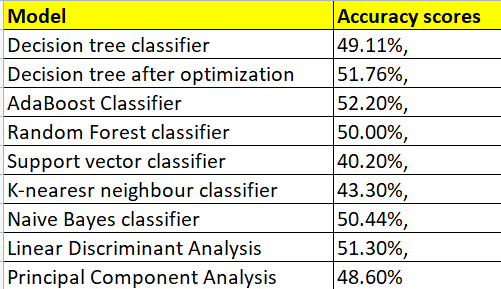

Since this is a classification problem, we have used different classifier algorithms and evaluated the performance to check which model performed better based on the accuracy scores.

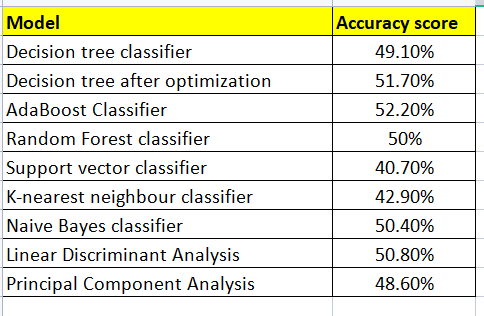

Model and Accuracy scores,
Decision tree classifier	49.11%,
Decision tree after optimization	51.76%,
AdaBoost Classifier	52.20%,
Random Forest classifier	50.0%,
Support vector classifier	40.20%,
K-nearesr neighbour classifier	43.30%,
Naive Bayes classifier	50.44%,
Linear Discriminant Analysis	51.30%,
Principal Component Analysis	48.60%

From the above table, we can observe that AdaBosst classifier performed the best on our dataset with 52.2% times correctly predicting the frequency of usage of cannabis on the test data.
Optimized Decision tree, Linear Discriminant Analysis, Naive Bayes classifier and Random Forest Classifier also performed well on dataset after AdaBoost with close to 50-51% correct predictions on the unknown data
Decision tree classifier and PCA performed average on our dataset with close to 49.11% accuracy.
Support Vector classifier provides accuracy of 40.2% and it is not useful for our problem since it is a multiclass problem and SVM doesn't support multiclass classification .

From the above acuuracy evaluation metric, we can choose AdaBoost Classifier to make predictions on the dataset and predict our target variable CAN_O5(frequency of usage of Cannabis)

Some meaningful insights from the analysis:

1) From chi square test, we figured that CAN_20F,CAN_20D and CAN_20C have great influence on the target variable. However, there is high correlation between these three features and also, in the original dataset these three columns had 877 missing values. Hence, we cannot completely rely on these features in predicting the frequency of usage of Cannabis. We have kept only CAN_20F (Ease of access of Cannabis) in our predictions as it gave better test accuracy results compared to CAN_20D(Loneliness) or CAN_20C (Boredom). Eace of access to cannabis contributed to increased consumption of cannabis during COVID-19

2) The next 4 features that contribute to predicting the target variables are ME_05 (Mental health), LS_05 (Life satisfaction scale), PEDUC_LC(Respondents highest level of education ever completed) and PEMPSTC(Employment status). We find that as the mental health improves, the consumption of Cannbais is lesser. Similarly, as the life satisfaction scale decreases, the consumtion of Cannabis increases. The education level of the respondent had positive correlation with the consumption of cannabis. Higher educated respondents tend to consume more cannabis. Also, the participants  who were absent from work due to COVID-19 consumed more cannabis than he ones who were employed and was part of a reference work

3) PHHLDSZC(Household size), AGEGRP(Age group) and PMARSTC(Marital status) had little influence on the target variable. Hence, we have retained these features in our analysis

4) IMMIGRNC( Immigration status),RURURB(Rural/Urban indicator) and SEX (Sex of respondent) had very less information about the target variable. Therefore these three features were omitted from buliding the model.

Future scope:

1) Since the target variable in our sample is unbalanced, there could have been biases in the sample. The project aims to undersample the highest category of the target variable using TomekLinks or with any other under-sampling techniques to balance the data, apply the machine lerning algorithms again and evaluate the model performance.

To solve imbalance classification problems

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

2) Apply deep learning and neural networks to learn the hidden features from the combination of basic features that influences the target variable  
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

